In [1]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline


In [2]:
filename="/Users/irffanalahi/Research/weekly/for_9_3_20/new/finalcorreplot/ourpbmc_usingMeanBasedRule.py_minCpG3_minval0.25_maxval0.75_sorted_all_matrix_Ciberin"

df=pd.read_csv(filename,sep="\t")

x=  'CD4 (S008H151)'
y='CD4 (1382)'

xyfixed_lim=False

only_scatter=False

In [3]:
df.head()

,position,C00184A3bs_matneu.bw.bedgraph_rolled,C001UYA1bs_matneu.bw.bedgraph_rolled,C00256A1bs_CD8.bw.bedgraph_rolled,C002CTA1bs_cytnk.bw.bedgraph_rolled,C003N351_memb.bw.bedgraph_rolled,C003VO55_CD8.bw.bedgraph_rolled,C004GD51_matneu.bw.bedgraph_rolled,C0066P51_CD8.bw.bedgraph_rolled,C0067N51_cytnk.bw.bedgraph_rolled,...,NBC_NC11_83_naiveb.bw.bedgraph_rolled,CD4 (S008H151),S009W451_CD4.bw.bedgraph_rolled,S00C2F51_CD8.bw.bedgraph_rolled,S017RE51_memb.bw.bedgraph_rolled,S01BHIA1_mono.bw.bedgraph_rolled,S01E03A1_mono.bw.bedgraph_rolled,S01E8O51_cytnk.bw.bedgraph_rolled,S01ECGA1_naiveb.bw.bedgraph_rolled,S01MAPA1_mono.bw.bedgraph_rolled
0,chr1:268066,0.121,0.142333,0.1780,0.1790,0.067333,0.064333,0.254667,0.317667,0.123667,...,0.0000,NaN,NaN,0.371667,0.179000,0.099667,0.1100,0.029000,0.081667,0.119000
1,chr1:629152,0.885,0.964800,0.9754,0.9792,0.881600,0.856400,0.978400,0.707000,0.955800,...,0.8272,0.94725,0.95,0.874000,0.939800,0.928200,0.9798,0.980600,0.933600,0.970000
2,chr1:630520,NaN,0.555667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.914000,0.896000,0.9490,0.163667,0.309667,0.822333
3,chr1:631431,NaN,0.500000,NaN,NaN,0.667000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.807333,0.864667,0.9230,0.933667,0.722333,0.980333
4,chr1:631731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.816200,0.852800,0.9258,0.842600,0.765333,0.935000


In [4]:

df=pd.DataFrame({ x: df[x], y: df[y] })
df.head()

,CD4 (S008H151),CD4 (1382)
0,NaN,NaN
1,0.94725,1.0
2,NaN,NaN
3,NaN,1.0
4,NaN,1.0


In [5]:
df=df.dropna()
df.head()

,CD4 (S008H151),CD4 (1382)
1,0.947250,1.0
7,0.568000,1.0
9,0.000000,0.0
18,0.026667,0.0
19,0.000000,0.0


In [6]:
corr = pearsonr(df[x], df[y])

#corr = [np.round(c, 5) for c in corr]
print(corr)

text='r = %s \nP = %s' % (format(corr[0], '.3f'), format(corr[1], ".3e") )

if corr[1]==0:
   text='r = %s \nP < 0.0001' % (format(corr[0], '.3f') ) 

(0.987354004238545, 0.0)


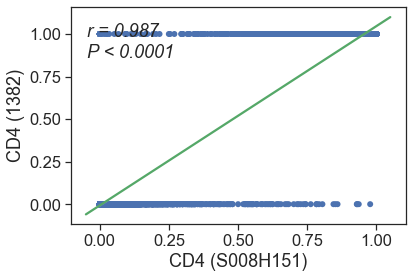

In [7]:
sns.set(style="ticks",font_scale=1.5)
if xyfixed_lim==True:
    plt.xlim([0, 0.8])
    plt.ylim([0, 0.8])

g=sns.scatterplot(df[x], df[y],edgecolor='none')
#g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

if only_scatter==False:
    ax=sns.regplot(df[x], df[y],scatter=False,color="g")




    anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
    ax.add_artist(anc)


#default 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']




#hfont = {'fontname':'Helvetica'}
#plt.title('title',**hfont)

savename=filename+"_"+x+"_"+y+".pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")
plt.show()
#sns.jointplot(data=df, x=x, y=y, kind='reg', hue=df[celltype])